In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
train_df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,0,0,0,0,0,0,3,11,1,65
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,0,0,0,0,0,0,3,11,0,68
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,0,0,0,0,0,0,3,11,0,57
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,0,0,0,0,0,3,11,0,38
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,0,0,0,0,0,0,3,11,0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,...,0,0,0,0,0,0,3,11,0,55
2201,2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,...,0,0,0,1,0,0,3,11,0,76
2202,2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,...,0,1,0,0,0,0,3,11,0,41
2203,2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,...,0,0,0,0,0,0,3,11,0,66


In [5]:
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
train_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,65
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,68
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,57
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,38
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,41


In [23]:
train_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'NumChildren', 'Time', 'Dt_year', 'Period', 'MntExpenditure',
       'NumPurchases'],
      dtype='object')

#### 1. People

- ID: Customer's unique identifier : 고객번호
- Year_Birth: Customer's birth year : 출생연도
- Education: Customer's education level : 교육수준, 학력
- Marital_Status: Customer's marital status : 결혼 상태
- Income: Customer's yearly household income : 가구 소득
- Kidhome: Number of children in customer's household : 자녀 수
- Teenhome: Number of teenagers in customer's household : 청소년 자녀 수
- Dt_Customer: Date of customer's enrollment with the company : 고객 회사 등록 날짜
- Recency: Number of days since customer's last purchase : 고객의 마지막 구매 이후 일 수
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise : 지난 2년간 고객의 컴플레인 여부(한 경우 1, 아니면 0)

#### 2. Products

- MntWines: Amount spent on wine in last 2 years : 지난 2년 와인 지출 비용
- MntFruits: Amount spent on fruits in last 2 years : 지난 2년 과일 지출 비용
- MntMeatProducts: Amount spent on meat in last 2 years : 지난 2년 육류 지출 비용
- MntFishProducts: Amount spent on fish in last 2 years : 지난 2년 생선류 지출 비용
- MntSweetProducts: Amount spent on sweets in last 2 years : 지난 2년 간식 지출 비용
- MntGoldProds: Amount spent on gold in last 2 years : 지난 2년간 금 지출 비용
        
#### 3. Promotion

- NumDealsPurchases: Number of purchases made with a discount : 할인일 때 구매한 횟수
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise : 첫 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise : 두 번재 캠페인에서 제안 수락한 경우 1, 그 외 0
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise : 세 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise : 네 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise : 다섯 번째 캠페인에서 제안 수락한 경우 1, 그 외 0
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise : 마지막 캠페인에서 제안 수락한 경우 1, 그 외 0

#### 4. Place

- NumWebPurchases: Number of purchases made through the company’s website : 웹사이트를 통해 구매한 횟수
- NumCatalogPurchases: Number of purchases made using a catalogue : 카탈로그를 통해 구매한 횟수
- NumStorePurchases: Number of purchases made directly in stores : 가게에서 구매한 횟수
- NumWebVisitsMonth: Number of visits to company’s website in the last month : 지난 달 웹사이트를 방문수

========================================================================================================================

### 1. People

1. Year_Birth(출생연도) -> Age(나이)

In [ ]:
# train_df['Age'] = 2022 - train_df['Year_Birth']

2. Kidhome(자녀 수) + Teenhome(청소년 자녀 수) -> Children(총 자녀 수)

In [8]:
train_df['NumChildren'] = train_df['Kidhome'] + train_df['Teenhome']

In [9]:
train_df['NumChildren'].value_counts()

1    1112
0     628
2     415
3      50
Name: NumChildren, dtype: int64

3. Dt_Customer(고객 회사 등록 날짜) -> Period (가입 기간)

In [10]:
import datetime

In [11]:
train_df['Time'] = pd.to_datetime(train_df.Dt_Customer, format='%d-%m-%Y')

In [12]:
train_df['Dt_year'] = train_df['Time'].dt.year

In [13]:
train_df['Time'].sort_values()

1235   2012-07-30
1342   2012-07-31
2003   2012-08-01
704    2012-08-01
956    2012-08-01
          ...    
42     2014-06-28
1786   2014-06-28
776    2014-06-28
969    2014-06-29
187    2014-06-29
Name: Time, Length: 2205, dtype: datetime64[ns]

In [14]:
period = datetime.datetime(2022,7,17) - train_df['Time']
period

0      3603 days
1      3053 days
2      3252 days
3      3079 days
4      3101 days
          ...   
2200   3321 days
2201   2959 days
2202   3095 days
2203   3096 days
2204   3562 days
Name: Time, Length: 2205, dtype: timedelta64[ns]

In [15]:
train_df['Period'] = period.dt.days
train_df['Period']

0       3603
1       3053
2       3252
3       3079
4       3101
        ... 
2200    3321
2201    2959
2202    3095
2203    3096
2204    3562
Name: Period, Length: 2205, dtype: int64

4. Marital_Status(결혼 상태) -> Partner(결혼상태에 따른 파트너 유무)

In [24]:
train_df['Marital_Status'].value_counts()

Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [25]:
train_df["Partner"] = train_df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

In [26]:
train_df['Partner'].value_counts()

Yes    1422
No      783
Name: Partner, dtype: int64

In [ ]:
# 나머지 변수들

- Education(교육수준, 학력)
- Income(가구 소득)
- Recency(고객의 마지막 구매 이후 일 수)
- Complain(지난 2년간 고객의 컴플레인 여부(한 경우 1, 아니면 0))

In [ ]:
# Education, Marital_Status 더미변수 변환

========================================================================================================================

### 2. Products

1. MntWines(지난 2년 와인 지출) + MntFruits(지난 2년 과일 지출) + MntMeatProducts(지난 2년 육류 지출) + MntFishProducts(지난 2년 생선류 지출) + MntSweetProducts(지난 2년 간식 지출) + MntGoldProds(지난 2년간 금 지출) -> MntExpenditure(지난 2년간 총 지출)

In [17]:
train_df['MntExpenditure'] = train_df['MntWines'] + train_df['MntFruits'] + train_df['MntMeatProducts'] + train_df['MntFishProducts'] + train_df['MntSweetProducts'] + train_df['MntGoldProds']

<AxesSubplot:>

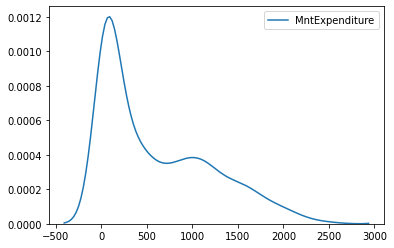

In [18]:
sns.kdeplot(train_df['MntExpenditure'])

<AxesSubplot:xlabel='Income', ylabel='MntExpenditure'>

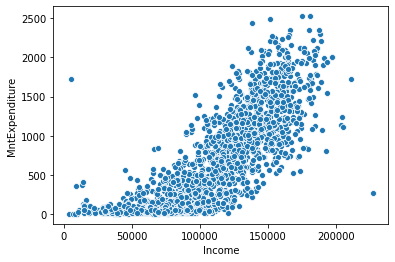

In [19]:
# Income*2 (2년간 가구 소득)과 MntExpenditure(2년간 총 지출)간의 상관관계

sns.scatterplot(2*train_df['Income'], train_df['MntExpenditure'])

========================================================================================================================

### 3. Promotion

- NumDealsPurchases(할인일 때 구매한 횟수)
- AcceptedCmp1(첫 번째 캠페인에서 제안 수락한 경우 1, 그 외 0)
- AcceptedCmp2(두 번재 캠페인에서 제안 수락한 경우 1, 그 외 0)
- AcceptedCmp3(세 번째 캠페인에서 제안 수락한 경우 1, 그 외 0)
- AcceptedCmp4(네 번째 캠페인에서 제안 수락한 경우 1, 그 외 0)
- AcceptedCmp5(다섯 번째 캠페인에서 제안 수락한 경우 1, 그 외 0)
- Response(마지막 캠페인에서 제안 수락한 경우 1, 그 외 0)

### 4. Place

1. NumWebPurchases(웹사이트를 통해 구매한 횟수) + NumCatalogPurchases(카탈로그를 통해 구매한 횟수) + NumStorePurchases(가게에서 구매한 횟수) -> NumPurchases(총 구매 횟수)

In [20]:
train_df['NumPurchases'] = train_df['NumWebPurchases'] + train_df['NumCatalogPurchases'] + train_df['NumStorePurchases']

<AxesSubplot:>

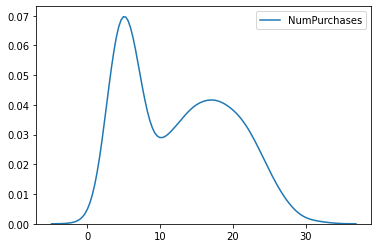

In [21]:
sns.kdeplot(train_df['NumPurchases'])

<AxesSubplot:xlabel='NumPurchases', ylabel='MntExpenditure'>

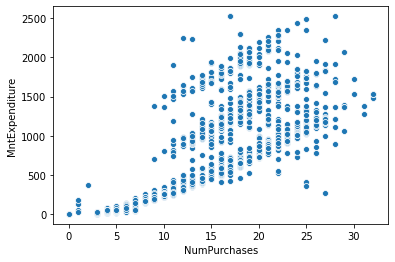

In [22]:
# NumPurchases (?년간 총 구매 횟수)과 MntExpenditure(2년간 총 지출)간의 상관관계

sns.scatterplot(train_df['NumPurchases'], train_df['MntExpenditure'])

In [ ]:
# 나머지 변수들

- NumWebVisitsMonth(지난 달 웹사이트를 방문수)

========================================================================================================================

In [27]:
train_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'NumChildren', 'Time', 'Dt_year', 'Period', 'MntExpenditure',
       'NumPurchases', 'Partner'],
      dtype='object')

- 변수들 간의 상관관계 살펴보기 -> 인사이트 발견
- segmentation할 기준 변수 생각해보기
- 어떤 변수가 가장 영향력 있는 변수일지
- 분류 모델 알아보기